In [1]:
import numpy as np
import pandas as pd
import gc
import lightgbm as lgb
import matplotlib.pyplot as plt

In [5]:
df = pd.read_pickle("/Users/chienan/Pycon/github/SportLottery/input/FEATURE_AGG_2012TO2019.pkl")

In [6]:
df_train = df[df.GAME_ID<"0021700000"].reset_index(drop=True)
df_test = df[df.GAME_ID>"0021700000"].reset_index(drop=True)

In [7]:
df_train.loc[df_train[df_train.loc[:,"PLUS_MINUS"]>0].index,"PLUS_MINUS"] = 1
df_train.loc[df_train[df_train.loc[:,"PLUS_MINUS"]<0].index,"PLUS_MINUS"] = 0
df_test.loc[df_test[df_test.loc[:,"PLUS_MINUS"]>0].index,"PLUS_MINUS"] = 1
df_test.loc[df_test[df_test.loc[:,"PLUS_MINUS"]<0].index,"PLUS_MINUS"] = 0

In [8]:
X_train = df_train.loc[:, [col for col in df_train.columns if (col not in ["GAME_ID","GAME_DATE","PLUS_MINUS"])&("TEAM_ID" not in col)]]
X_test = df_test.loc[:, [col for col in df_test.columns if (col not in ["GAME_ID","GAME_DATE","PLUS_MINUS"])&("TEAM_ID" not in col)]]
y_train = df_train.loc[:, "PLUS_MINUS"]
y_test = df_test.loc[:, "PLUS_MINUS"]

In [9]:
train_dataset = lgb.Dataset(X_train, y_train)

In [10]:
param = {"metric": ("binary_error"),
        "objective": "binary"}

In [11]:
print("start training...")
%time model = lgb.train(train_set=train_dataset, params=param)

start training...
CPU times: user 25.3 s, sys: 1.53 s, total: 26.9 s
Wall time: 5.46 s


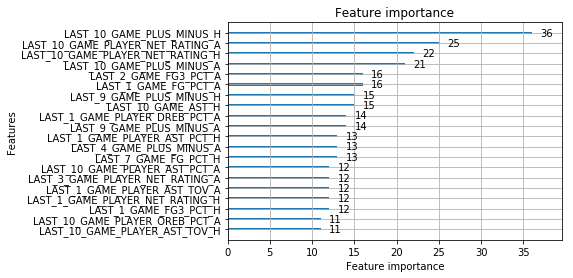

In [12]:
lgb.plot_importance(booster=model,max_num_features=20,importance_type="split")
plt.show()

In [13]:
sum((model.predict(X_test)>0.5)==y_test)/len(y_test), sum(y_test)/len(y_test)

(0.6855871433210746, 0.6569270243622714)

In [14]:
sum(y_test[model.predict(X_test)>0.5])/sum((model.predict(X_test)>0.5))

0.729488883400178

In [15]:
sum(model.predict(X_test)[y_test.astype(bool)]>0.5)/sum(y_test)

0.8286830232879213

In [16]:
game_info = df_test[["GAME_ID"]].copy()
game_info.loc[:,"PREDICTION"] = model.predict(X_test)

In [17]:
len(game_info)

341799

In [18]:
game_info = game_info.merge(pd.read_pickle("GAMEID_LOTTERY_2012to2019.pkl"),on="GAME_ID",how="left").fillna(0)

In [19]:
game_info = game_info[game_info.loc[:,"AWAY_HANDICAP_POINT":].sum(axis=1)!=0]

In [20]:
game_info.GAME_ID.unique()[game_info.groupby("GAME_ID").PREDICTION.count()>1]

array(['0021700808', '0021800001', '0021800002', '0021800003',
       '0021800004', '0021800005', '0021800006', '0021800007',
       '0021800008', '0021800009', '0021800010', '0021800011',
       '0021800012', '0021800013', '0021800014', '0021800015',
       '0021800016', '0021800017', '0021800018', '0021800019',
       '0021800020', '0021800021', '0021800022', '0021800023',
       '0021800024', '0021800025', '0021800026', '0021800027',
       '0021800028', '0021800029', '0021800030', '0021800031',
       '0021800032', '0021800033', '0021800034', '0021800035',
       '0021800036', '0021800037', '0021800038', '0021800039',
       '0021800040', '0021800041', '0021800042', '0021800043',
       '0021800044', '0021800045', '0021800046', '0021800047',
       '0021800048', '0021800049', '0021800050', '0021800051',
       '0021800052', '0021800053', '0021800054', '0021800055',
       '0021800056', '0021800057', '0021800058', '0021800059',
       '0021800060', '0021800061', '0021800062', '00218

In [21]:
game_info = game_info[game_info.GAME_ID!='0021700808'].reset_index(drop=True)

In [22]:
rating = game_info.PREDICTION.values
home_rate = game_info.HOME_RATE.values
away_rate = game_info.AWAY_RATE.values
game_id = game_info.GAME_ID.values

In [24]:
list(map(lambda x : x ,np.append(home_rate.reshape(-1,1),away_rate.reshape(-1,1),axis=1)))

[array([1.45, 2.15]),
 array([1.18, 3.3 ]),
 array([1.45, 2.15]),
 array([1.5 , 2.05]),
 array([2.15, 1.45]),
 array([1.2, 3.1]),
 array([1.45, 2.15]),
 array([1.45, 2.15]),
 array([1.25, 2.85]),
 array([1.5 , 2.05]),
 array([1.55, 1.95]),
 array([2.05, 1.5 ]),
 array([3.5 , 1.15]),
 array([0., 0.]),
 array([0., 0.]),
 array([2.85, 1.25]),
 array([1.45, 2.15]),
 array([2.7 , 1.28]),
 array([1.5 , 2.05]),
 array([1.22, 3.  ]),
 array([1.9, 1.6]),
 array([1.7, 1.8]),
 array([1.35, 2.45]),
 array([1.3, 2.6]),
 array([3.75, 1.12]),
 array([1.5 , 2.05]),
 array([0., 0.]),
 array([0., 0.]),
 array([1.18, 3.3 ]),
 array([2.15, 1.45]),
 array([0., 0.]),
 array([0., 0.]),
 array([3.75, 1.12]),
 array([1.6, 1.9]),
 array([0., 0.]),
 array([2.6, 1.3]),
 array([0., 0.]),
 array([1.65, 1.85]),
 array([1.35, 2.45]),
 array([2.45, 1.35]),
 array([1.4, 2.3]),
 array([0., 0.]),
 array([1.2, 3.1]),
 array([1.2, 3.1]),
 array([0., 0.]),
 array([1.55, 1.95]),
 array([1.4, 2.3]),
 array([2.15, 1.45]),
 arr

In [25]:
def stratage_expect(game_id, rating, home_rate, away_rate):
    df = pd.DataFrame(game_id,columns=["GAME_ID"])
    stratage_dict = {0:"AWAY",1:"HOME"}
    df["STRATAGE_EN"] =  list(map(lambda x : stratage_dict[x], 
                                  np.argmax(np.append(((1-rating)*away_rate).reshape(-1,1),
                                                      (rating*home_rate).reshape(-1,1),axis=1),axis=1)))
    df["STRATAGE"] = np.argmax(np.append(((1-rating)*away_rate).reshape(-1,1),
                                            (rating*home_rate).reshape(-1,1),axis=1),axis=1)
    df["HOME_RATE"] = home_rate
    df["AWAY_RATE"] = away_rate
    df["EXPECT_RETURN"] = np.max(np.append((rating*home_rate).reshape(-1,1),
                                           ((1-rating)*away_rate).reshape(-1,1),axis=1),axis=1)
    return df  

In [26]:
stratage_df = stratage_expect(game_id, rating, home_rate, away_rate)

In [27]:
stratage_df = stratage_df[stratage_df.EXPECT_RETURN>0]

In [28]:
stratage_df = stratage_df.merge(df_test[["GAME_ID","PLUS_MINUS"]],on="GAME_ID",how="inner")

In [29]:
stratage_df.head()

,GAME_ID,STRATAGE_EN,STRATAGE,HOME_RATE,AWAY_RATE,EXPECT_RETURN,PLUS_MINUS
0,0021700001,AWAY,0,1.45,2.15,1.049370,1.0
1,0021700002,HOME,1,1.18,3.30,1.118533,0.0
2,0021700003,HOME,1,1.45,2.15,0.965521,1.0
3,0021700004,AWAY,0,1.50,2.05,1.050234,1.0
4,0021700005,HOME,1,2.15,1.45,0.990605,1.0


In [30]:
def calculate_gt(away, home, outcome):
    return [away,home][int(outcome)]

In [31]:
stratage_df["GROUND_TRUTH"] = stratage_df.apply(lambda x : calculate_gt(x["AWAY_RATE"],x["HOME_RATE"],x["PLUS_MINUS"]),axis=1)

In [32]:
stratage_df[stratage_df.STRATAGE==stratage_df.PLUS_MINUS].GROUND_TRUTH.sum()

38365769.069999054

In [33]:
sum(stratage_df.STRATAGE!=stratage_df.PLUS_MINUS)

28504611

In [34]:
1145.44-643,824.93-467, 161.8-127, 26.4-30

(502.44000000000005,
 357.92999999999995,
 34.80000000000001,
 -3.6000000000000014)

In [35]:
1072.58-632,718.97-424, 163.71-62 ,35.68-8

(440.5799999999999, 294.97, 101.71000000000001, 27.68)